<a href="https://colab.research.google.com/github/jobiemay2000/COP-Kmeans/blob/master/Copy_of_COP_Kmeans_randomseed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jobiemay2000/COP-Kmeans.git

Cloning into 'COP-Kmeans'...
remote: Enumerating objects: 333, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 333 (delta 0), reused 0 (delta 0), pack-reused 329
Receiving objects: 100% (333/333), 176.86 KiB | 1.37 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
import sys
sys.path.append('/content/COP-Kmeans') 

In [ ]:
import numpy as np
from copkmeans.cop_kmeans import cop_kmeans
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure

In [ ]:
url = "https://github.com/jobiemay2000/MDRP/blob/main/data/2-stage-data.csv?raw=true"
# https://github.com/jobiemay2000/MDRP/blob/main/data/Riders.csv
orders = pd.read_csv(url)
P = orders.iloc[:, [1, 2]].values
D = orders.iloc[:, [3, 4]].values
locations = np.concatenate((P, D))
locations


array([[2725. , 2200. ],
       [1575. , 2587.5],
       [1650. , 1512.5],
       [ 637.5, 1012.5],
       [1425. , 1887.5],
       [1262.5, 2137.5],
       [ 875. , 1125. ],
       [2425. , 1450. ],
       [1375. , 1850. ],
       [1375. , 1850. ],
       [2087.5, 1250. ],
       [1450. , 2700. ],
       [2187.5,  625. ],
       [2800. , 2325. ],
       [2650. , 2225. ],
       [2825. , 2425. ],
       [ 887.5, 1137.5],
       [1675. ,  325. ],
       [1512.5, 1362.5],
       [2625. , 2262.5],
       [2625. , 2262.5],
       [ 912.5,  687.5],
       [1925. , 2062.5],
       [1787.5,  412.5],
       [1837.5, 2362.5],
       [1262.5, 2075. ],
       [1687.5, 1650. ],
       [2000. , 2350. ],
       [1612.5, 2250. ],
       [1487.5, 2225. ],
       [2350. , 2600. ],
       [1837.5, 2362.5],
       [1862.5, 1425. ],
       [2400. , 2375. ],
       [1437.5, 1362.5],
       [1925. , 1887.5],
       [2250. , 1475. ],
       [2012.5, 1750. ],
       [1825. , 2050. ],
       [2350. ,  725. ],


In [ ]:
must_link = [ (n,(n+len(orders))) for n in range(len(orders)) ]
# n_clusters = int(len(orders)/4)
clusters, centers = cop_kmeans(dataset=locations, k=8, ml=must_link)
labels = np.array(clusters)

print(centers)


[[1525.4166666666667, 1830.2083333333333], [1758.3333333333333, 1681.25], [1624.3055555555557, 1980.5555555555557], [2362.5, 2106.25], [2162.5, 1627.5], [2214.0625, 2112.5], [1398.9583333333333, 1401.0416666666667], [1668.75, 839.5833333333334]]


In [ ]:
bundle = { clusters[ii]+1: [] for ii in range(len(clusters)) }

for index, i in enumerate(clusters):
  if index < 41:
    bundle[i+1] += [index+1]
print(bundle)

{6: [1, 14, 15, 16, 20, 21, 31, 34], 3: [2, 12, 23, 25, 28, 29, 30, 32, 39], 2: [3, 27, 33], 7: [4, 7, 17, 19, 22, 35], 1: [5, 6, 9, 10, 26, 41], 5: [8, 11, 37, 38, 40], 8: [13, 18, 24], 4: [36]}


<function matplotlib.pyplot.show(*args, **kw)>

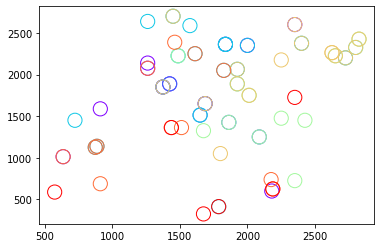

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(bundle)))
X = np.concatenate((P, D))
for ix in range(len(bundle.keys())):
    plt.scatter(X[labels==ix, 0], X[labels==ix, 1], s=200, marker='o', color=colors[ix], facecolor='none')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

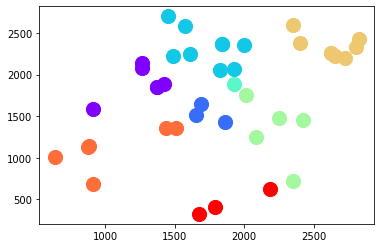

In [ ]:
#PICK UP
p_labels = labels[0:41]

for ix in range(len(bundle.keys())):
    plt.scatter(P[p_labels==ix, 0], P[p_labels==ix, 1], s=200, marker='o', color=colors[ix])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

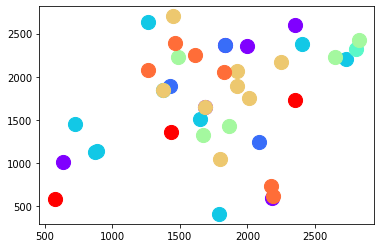

In [ ]:
#DROP OFF
d_labels = labels[41:82]

for ix in range(len(bundle.keys())):
    plt.scatter(D[d_labels==ix, 0], D[d_labels==ix, 1], s=200, marker='o', color=colors[ix])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

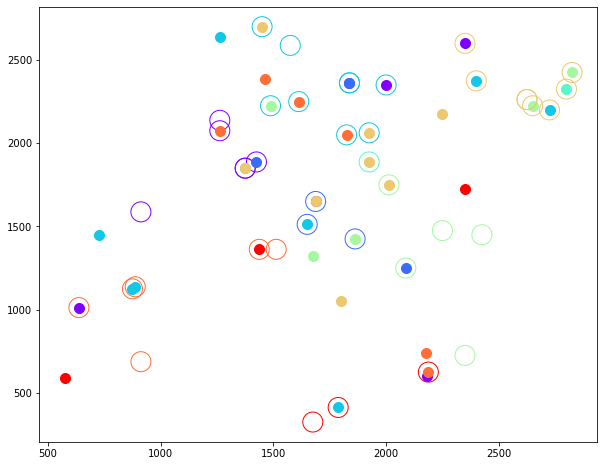

In [ ]:
plt.figure(figsize=(10,8))
for ix in range(len(bundle.keys())):
    plt.scatter(P[p_labels==ix, 0], P[p_labels==ix, 1], s=400, marker='o', color=colors[ix], facecolors='none')
    plt.scatter(D[d_labels==ix, 0], D[d_labels==ix, 1], s=100, marker='o', color=colors[ix], )

plt.show